Populating the interactive namespace from numpy and matplotlib


Start date,2015-01-02
End date,2017-12-29
Total months,35
,Backtest
Annual return,51.9%
Cumulative returns,249.7%
Annual volatility,33.2%
Sharpe ratio,1.42
Calmar ratio,2.59
Stability,0.92
Max drawdown,-20.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.99,2015-12-01,2016-02-08,2016-05-16,120
1,14.22,2015-03-20,2015-08-25,2015-10-05,142
2,12.57,2017-02-21,2017-04-13,2017-05-10,57
3,10.62,2017-06-08,2017-07-03,2017-08-07,43
4,10.62,2017-08-07,2017-08-11,2017-10-09,46


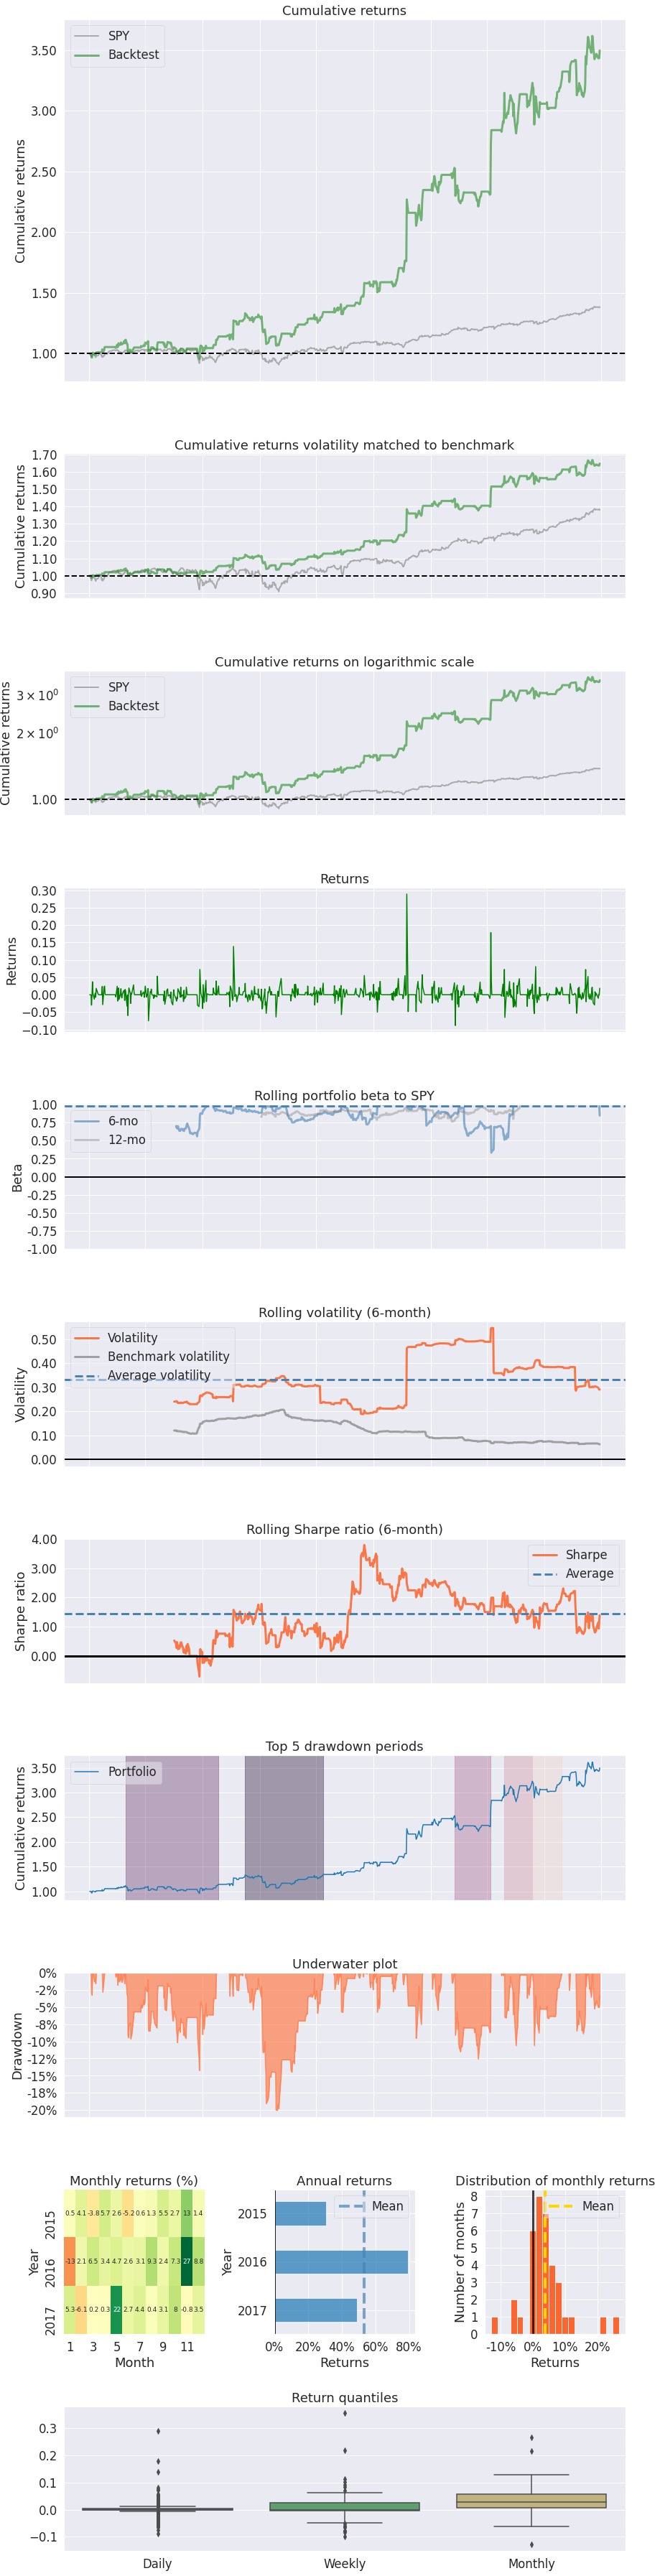

In [3]:
import pickle
import pandas as pd
import pyfolio as pf
%pylab inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


def process_performance(fname):
    perf = pd.read_pickle('{}.pickle'.format(fname))
    perf.to_csv('{}.csv'.format(fname))
    # Normalize the dates
    perf.index = perf.index.normalize()
    return perf


def create_benchmark(fname):
    # benchmark_returns (pd.Series, optional) -- Daily noncumulative returns of the benchmark. This is in the same style as returns.
    bench = pd.read_csv('{}.csv'.format(fname), index_col='date', parse_dates=True, date_parser=lambda col: pd.to_datetime(col, utc=True))
    # Create a series
    bench_series = pd.Series(bench['return'].values, index=bench.index)
    bench_series.rename(fname, inplace=True)
    return bench_series

# Use PyFolio to generate a performance report - benchmark_rets is optional
def analyze(perfdata, benchdata):
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perfdata)
#     pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=benchdata)
    pf.create_returns_tear_sheet(returns, benchmark_rets=benchdata)

# Create the performance dataframe
perf = process_performance('lstm')

# Create a benchmark dataframe
bench_series = create_benchmark('SPY')


# Filter for the dates in returns to line up the graphs - normalize cleans up the dates
bench_series = bench_series[bench_series.index.isin(perf.index)]


# Run the tear sheet analysis
analyze(perf, bench_series)

